<a href="https://colab.research.google.com/github/Ganeshb979/Airbnb-Bookings-Analysis/blob/main/Ganesh_Bayas_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

**Importing Libraries**

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from collections import Counter

**Reading dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path= '/content/drive/MyDrive/airbnb EDA Ganesh Bayas/Airbnb NYC 2019.csv'
df=pd.read_csv(path)

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Observations:**

Total 16 columns are present in the dataset.

total observations are 48895.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Observations**

Min of Price variable is 0, max is 10000. Mean price is 152. On an average people stay 7 days in a room.

**Checking Null Values**

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**observations:**

There are total four columns with null values.

name column is having total 16 null values.

host_name is having 21 null values.

last_review and reviews_per_month are having 1052 null vlues.

we will look at the columns and decide what we can do with them.

In [12]:
#missing value in percentage.
Total = df.isnull().sum().sort_values(ascending = False)#total per column
missing_values= round(((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending = False),2)
#missing_value data frame.
missing_total_percentage = pd.concat([Total,missing_values],axis = 1,keys = ['Total','Percentage'],sort = False).sort_values('Total',ascending=False)
missing_total_percentage

,Total,Percentage
last_review,10052,20.56
reviews_per_month,10052,20.56
host_name,21,0.04
name,16,0.03
id,0,0.00
host_id,0,0.00
neighbourhood_group,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00


last_review has value which is in date yyyy-mm-dd format. So, I'm changing null value to 0000-00-00

reviews_per_month has numerical value so I'll replace the null value with the median value of that column.

name and host_name column have categorical value so I'll replace the null value with the "missing" value




In [13]:
df['last_review'] = df['last_review'].fillna("0000-00-00")

In [14]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace = True)

In [15]:
# code for replacing Nan values in columns Name and host_name with "missing"

df['name']= df['name'].fillna('missing')
df['host_name'] = df['host_name'].fillna('missing')

After cleaning the null values in the dataset validate that all null values are removed or not


In [16]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [18]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Now let's check the unique value in neighbourhood group

Analyse the unique values of neighbourhood group as this column will appear very handy for later analysis


In [19]:
#Analyse the unique values of neighbourhood group as this column will appear very handy for later analysis
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Now let's examine the unique value present in neighbourhood

In [20]:
len(df.neighbourhood.unique())

221

let's examine the unique value present in room_type


In [21]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

stop words removal:

1) download the nltk stopwords in english.
2) replace pantuation and special symbols.
3) make it string and convert all into lower case.
then split the words and compaire each with the stopwords and keep only those which are not in stopword list.


In [22]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:

def stop_word_removal(df):
  stop = stopwords.words('english')
  df.name = df.name.str.replace("[^\w\s]", "").str.lower()
  df.name = df.name.apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [25]:
text = stop_word_removal(df)
text = " ".join(str(each) for each in df.name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 720x432 with 0 Axes>

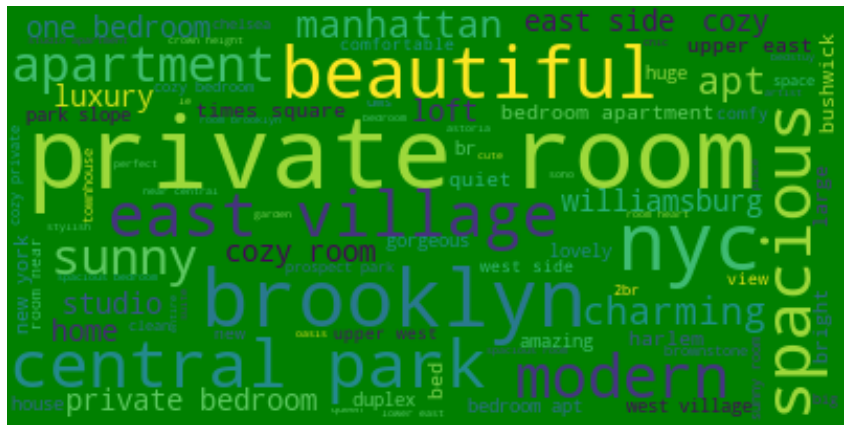

In [27]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
sns.set_theme(style="ticks", color_codes=True)
#  generator.
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=300, background_color="green").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
pass

**Obsevations**
 
This word cloud shows us the most frequent words.

In [28]:
#after removing stop words.
df.name


0                            clean quiet apt home park
1                                skylit midtown castle
2                               village harlemnew york
3                         cozy entire floor brownstone
4          entire apt spacious studioloft central park
                             ...                      
48890    charming one bedroom newly renovated rowhouse
48891        affordable room bushwickeast williamsburg
48892             sunny studio historical neighborhood
48893               43rd st time squarecozy single bed
48894                trendy duplex heart hells kitchen
Name: name, Length: 48895, dtype: object